In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans

from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans,AffinityPropagation

In [2]:
def gmm(X,k):
    gmm = GMM(n_components=k, covariance_type='full')
    gmm.fit(X)
    X_predicted = [ [] for i in range(k)]
    for x in X:
        X_predicted[gmm.predict([x])[0]].append(x)
    return X_predicted

In [3]:
def kmeans(X,k):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X)
    X_predicted = [ [] for i in range(k)]
    for x in X:
        X_predicted[kmeans.predict([x])[0]].append(x.tolist())
    return X_predicted

In [4]:
RNASeq_path = 'AdjustedRPKMOutput/RNASeq_chrE_mockT0.txt' 
RPF_path = 'AdjustedRPKMOutput/RPF_chrE_mockT0.txt'

In [5]:
RNASeq = pd.read_csv(RNASeq_path, sep='\t')
RPF = pd.read_csv(RPF_path, sep='\t')

In [6]:
RNASeq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,50.0,6.672930,62.0,5.568612,71.0,5.308751,30.0,2.859319,51.0,3.102104
1,NM_001143986,TLE6,1.0,0.105975,6.0,0.427921,3.0,0.178120,3.0,0.227049,3.0,0.144899
2,NM_001003803,ATP5S,41.0,11.526251,52.0,9.838214,52.0,8.190209,19.0,3.814631,22.0,2.818815
3,NM_001003800,BICD2,789.0,55.970762,1155.0,55.141030,1444.0,57.390343,706.0,35.767093,883.0,28.548580
4,NM_016649,ESF1,22.0,1.567982,26.0,1.247097,10.0,0.399306,9.0,0.458095,20.0,0.649663


In [7]:
RPF.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4
0,NM_017847,ODR4,86.0,13.722243,62.0,13.189469,49.0,14.172717,37.0,9.403085,39.0,10.487249
1,NM_001143986,TLE6,2.0,0.253404,2.0,0.337849,2.0,0.459350,1.0,0.201802,1.0,0.213527
2,NM_001003803,ATP5S,99.0,33.275110,83.0,37.193868,71.0,43.258655,46.0,24.625447,26.0,14.727463
3,NM_001003800,BICD2,512.0,43.424443,389.0,43.986848,284.0,43.662942,257.0,34.716778,230.0,32.874747
4,NM_016649,ESF1,84.0,7.157770,52.0,5.907596,41.0,6.333047,26.0,3.528692,26.0,3.733723


In [8]:
RNASeq = RNASeq[(RNASeq['cdReads0'] >= 10) & (RNASeq['cdReads1'] >= 10) & (RNASeq['cdReads2'] >= 10)& (RNASeq['cdReads3'] >= 10)& (RNASeq['cdReads4'] >= 10)]
RPF = RPF[(RPF['cdReads0'] >= 10) & (RPF['cdReads1'] >= 10) & (RPF['cdReads2'] >= 10)& (RPF['cdReads3'] >= 10)& (RPF['cdReads4'] >= 10)]

In [9]:
RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RNASeq[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [10]:
RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']] = RPF[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].apply(np.log2)

In [11]:
RNASeq['log2cdRPKM1']=RNASeq['cdRPKM1']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM2']=RNASeq['cdRPKM2']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM3']=RNASeq['cdRPKM3']-RNASeq['cdRPKM0']
RNASeq['log2cdRPKM4']=RNASeq['cdRPKM4']-RNASeq['cdRPKM0']

In [12]:
RPF['log2cdRPKM1']=RPF['cdRPKM1']-RPF['cdRPKM0']
RPF['log2cdRPKM2']=RPF['cdRPKM2']-RPF['cdRPKM0']
RPF['log2cdRPKM3']=RPF['cdRPKM3']-RPF['cdRPKM0']
RPF['log2cdRPKM4']=RPF['cdRPKM4']-RPF['cdRPKM0']

# TE

### ONLY RUN FOR MEDIAN NORMALIZATION

In [15]:
RNASeq['log2cdRPKM1']-=np.median(RNASeq['log2cdRPKM1'])
RNASeq['log2cdRPKM2']-=np.median(RNASeq['log2cdRPKM2'])
RNASeq['log2cdRPKM3']-=np.median(RNASeq['log2cdRPKM3'])
RNASeq['log2cdRPKM4']-=np.median(RNASeq['log2cdRPKM4'])

In [16]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]

In [17]:
filteredRNASeq.shape

(6239, 16)

In [18]:
filteredRNASeq.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,log2cdRPKM1,log2cdRPKM2,log2cdRPKM3,log2cdRPKM4
0,NM_017847,ODR4,50.0,2.738320,62.0,2.477318,71.0,2.408372,30.0,1.515671,51.0,1.633247,-0.218460,-0.127981,-0.245112,0.328171
3,NM_001003800,BICD2,789.0,5.806601,1155.0,5.785054,1444.0,5.842736,706.0,5.160561,883.0,4.835347,0.020996,0.238101,0.331496,0.461990
5,NM_016647,THEM6,137.0,5.314860,182.0,5.153280,219.0,5.155776,91.0,4.238939,99.0,3.712542,-0.119037,0.042883,-0.098384,-0.169074
8,NM_016640,MRPS30,246.0,5.085342,348.0,5.014428,411.0,4.989983,205.0,4.336624,241.0,3.922074,-0.028371,0.106608,0.228819,0.269977
14,NM_001253384,RPL15,98.0,5.349072,147.0,5.362692,121.0,4.817387,60.0,4.155570,67.0,3.666809,0.056163,-0.329719,-0.215966,-0.249019


In [19]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [20]:
TE.shape

(5766, 30)

In [21]:
RPF.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,log2cdRPKM1,log2cdRPKM2,log2cdRPKM3,log2cdRPKM4
0,NM_017847,ODR4,86.0,3.778444,62.0,3.721315,49.0,3.825044,37.0,3.233134,39.0,3.390564,-0.057130,0.046600,-0.545310,-0.387880
2,NM_001003803,ATP5S,99.0,5.056372,83.0,5.216993,71.0,5.434917,46.0,4.622078,26.0,3.880437,0.160621,0.378545,-0.434294,-1.175934
3,NM_001003800,BICD2,512.0,5.440435,389.0,5.459000,284.0,5.448337,257.0,5.117561,230.0,5.038908,0.018565,0.007902,-0.322874,-0.401528
4,NM_016649,ESF1,84.0,2.839510,52.0,2.562571,41.0,2.662900,26.0,1.819134,26.0,1.900615,-0.276939,-0.176611,-1.020377,-0.938895
5,NM_016647,THEM6,87.0,4.917487,89.0,5.365215,73.0,5.522523,56.0,4.953399,33.0,4.271920,0.447728,0.605036,0.035913,-0.645567


In [22]:
TE.head()

,AccNum,GeneName,cdReads0_x,cdRPKM0_x,cdReads1_x,cdRPKM1_x,cdReads2_x,cdRPKM2_x,cdReads3_x,cdRPKM3_x,...,cdReads2_y,cdRPKM2_y,cdReads3_y,cdRPKM3_y,cdReads4_y,cdRPKM4_y,log2cdRPKM1_y,log2cdRPKM2_y,log2cdRPKM3_y,log2cdRPKM4_y
0,NM_017847,ODR4,86.0,3.778444,62.0,3.721315,49.0,3.825044,37.0,3.233134,...,71.0,2.408372,30.0,1.515671,51.0,1.633247,-0.218460,-0.127981,-0.245112,0.328171
1,NM_001003800,BICD2,512.0,5.440435,389.0,5.459000,284.0,5.448337,257.0,5.117561,...,1444.0,5.842736,706.0,5.160561,883.0,4.835347,0.020996,0.238101,0.331496,0.461990
2,NM_016647,THEM6,87.0,4.917487,89.0,5.365215,73.0,5.522523,56.0,4.953399,...,219.0,5.155776,91.0,4.238939,99.0,3.712542,-0.119037,0.042883,-0.098384,-0.169074
3,NM_016640,MRPS30,300.0,5.629361,216.0,5.570369,128.0,5.258698,100.0,4.715900,...,411.0,4.989983,205.0,4.336624,241.0,3.922074,-0.028371,0.106608,0.228819,0.269977
4,NM_001253384,RPL15,145.0,6.171987,90.0,5.898869,28.0,4.657588,21.0,4.055896,...,121.0,4.817387,60.0,4.155570,67.0,3.666809,0.056163,-0.329719,-0.215966,-0.249019


In [23]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]

In [24]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [26]:
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.040124,1.243997,1.416672,1.717463,1.757317,0.203873,0.376548,0.677339,0.717193
1,NM_001003800,BICD2,-0.366166,-0.326054,-0.394399,-0.043000,0.203561,0.040112,-0.028233,0.323166,0.569727
2,NM_016647,THEM6,-0.397373,0.211936,0.366747,0.714460,0.559378,0.609309,0.764120,1.111833,0.956751
3,NM_016640,MRPS30,0.544020,0.555941,0.268715,0.379276,0.831364,0.011921,-0.275305,-0.164744,0.287344
4,NM_001253384,RPL15,0.822915,0.536178,-0.159799,-0.099673,0.722107,-0.286737,-0.982714,-0.922588,-0.100807


In [27]:
TE.keys()

Index(['AccNum', 'GeneName', 'TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4'],
      dtype='object')

In [28]:
TE.shape

(5766, 11)

In [29]:
TE.to_csv('AdjustedRPKMOutput/TE_chrE_filtered_mockT0.txt',sep='\t',index=False)

In [35]:
TE.head()

,AccNum,GeneName,TE0,TE1,TE2,TE3,TE4,foldTE1,foldTE2,foldTE3,foldTE4
0,NM_017847,ODR4,1.040124,1.243997,1.416672,1.717463,1.757317,0.203873,0.376548,0.677339,0.717193
1,NM_001003800,BICD2,-0.366166,-0.326054,-0.394399,-0.043000,0.203561,0.040112,-0.028233,0.323166,0.569727
2,NM_016647,THEM6,-0.397373,0.211936,0.366747,0.714460,0.559378,0.609309,0.764120,1.111833,0.956751
3,NM_016640,MRPS30,0.544020,0.555941,0.268715,0.379276,0.831364,0.011921,-0.275305,-0.164744,0.287344
4,NM_001253384,RPL15,0.822915,0.536178,-0.159799,-0.099673,0.722107,-0.286737,-0.982714,-0.922588,-0.100807


In [36]:
X = TE[['foldTE1',
       'foldTE2', 'foldTE3', 'foldTE4']].values

In [37]:
X[:5]

array([[ 0.20387279,  0.37654797,  0.67733875,  0.71719324],
       [ 0.04011205, -0.02823261,  0.32316621,  0.56972684],
       [ 0.60930873,  0.7641199 ,  1.11183341,  0.95675102],
       [ 0.01192117, -0.27530496, -0.16474355,  0.28734425],
       [-0.28673714, -0.98271375, -0.92258788, -0.10080732]])

In [38]:
# def plot_heatmap(X,idx):
#     plt.subplot(3, 2, idx+1)
# #     plt.figure()
#     sns.heatmap(X,xticklabels=['foldTE1',
#        'foldTE2', 'foldTE3', 'foldTE4'])
#     plt.title('Heatmap'+str(idx+1))

# list_nums = [5]   
# for num in list_nums:
#     clusters = kmeans(X,num)
#     idx=0
#     for cluster in clusters:
#         print(len(cluster))
#         plot_heatmap(cluster)
#         idx+=1
        
list_nums = [4,5,6]
for num in list_nums:
    clusters = kmeans(X,num) 
    f = plt.figure(figsize=(15,15))    
    for idx,cluster in enumerate(clusters):
        print(len(cluster))
#         plot_heatmap(cluster,idx)
        genes=[]
        acc_nums=[]
        for row in cluster:
            temp = TE.loc[(TE['foldTE1'] == row[0])& (TE['foldTE2']== row[1]) & (TE['foldTE3']== row[2])]
            if(not temp.empty):
                genes.append(temp['GeneName'].values[0])
                acc_nums.append(temp['AccNum'].values[0])
        print(len(cluster),len(genes))
        with open('/Users/akankshitadash/Desktop/Mock/'+str(num)+'/Gene'+str(idx+1)+'.txt','w') as f:
            for gene in genes:
                f.write("%s\n" % gene)
        with open('/Users/akankshitadash/Desktop/Mock/'+str(num)+'/AccNum'+str(idx+1)+'.txt','w') as f:
            for acc_num in acc_nums:
                f.write("%s\n" % acc_num)
#     plt.savefig('/Users/akankshitadash/Desktop/Heatmap'+str(num))
    #plt.show()

2332
2332 2332
1698
1698 1698
1211
1211 1211
525
525 525


<Figure size 1080x1080 with 0 Axes>

1732
1732 1732
370
370 370
1142
1142 1142
759
759 759
1763
1763 1763


<Figure size 1080x1080 with 0 Axes>

923
923 923
1661
1661 1661
296
296 296
988
988 988
751
751 751
1147
1147 1147


<Figure size 1080x1080 with 0 Axes>

In [ ]:
# def plot_heatmap(X):
#     plt.figure()
#     sns.heatmap(X,xticklabels=['TE0', 'TE1', 'TE2', 'TE3', 'TE4', 'foldTE1',
#        'foldTE2', 'foldTE3', 'foldTE4'])
#     plt.title('Heatmap')
#     plt.savefig('NonChrE/KMeansOutputTE/Heatmap'+str(len(X)))
#     plt.show()

# list_nums = [5]   
# for num in list_nums:
#     clusters = kmeans(X,num)
#     idx=0
#     for cluster in clusters:
#         print(len(cluster))
#         plot_heatmap(cluster)
#         idx+=1

# RPF

In [75]:
RPF.keys()

Index(['AccNum', 'GeneName', 'cdReads0', 'cdRPKM0', 'cdReads1', 'cdRPKM1',
       'cdReads2', 'cdRPKM2', 'cdReads3', 'cdRPKM3', 'cdReads4', 'cdRPKM4',
       'log2cdRPKM1', 'log2cdRPKM2', 'log2cdRPKM3', 'log2cdRPKM4'],
      dtype='object')

In [76]:
RPF.head()

,AccNum,GeneName,cdReads0,cdRPKM0,cdReads1,cdRPKM1,cdReads2,cdRPKM2,cdReads3,cdRPKM3,cdReads4,cdRPKM4,log2cdRPKM1,log2cdRPKM2,log2cdRPKM3,log2cdRPKM4
0,NM_017847,ODR4,93.0,4.041663,62.0,3.721315,49.0,3.825044,37.0,3.233134,39.0,3.390564,-0.320348,-0.216618,-0.808529,-0.651098
2,NM_001003803,ATP5S,81.0,4.917189,83.0,5.216993,71.0,5.434917,46.0,4.622078,26.0,3.880437,0.299804,0.517728,-0.295111,-1.036752
3,NM_001003800,BICD2,501.0,5.559427,389.0,5.459000,284.0,5.448337,257.0,5.117561,230.0,5.038908,-0.100426,-0.111089,-0.441865,-0.520519
4,NM_016649,ESF1,69.0,2.706042,52.0,2.562571,41.0,2.662900,26.0,1.819134,26.0,1.900615,-0.143471,-0.043142,-0.886908,-0.805427
5,NM_016647,THEM6,132.0,5.669262,89.0,5.365215,73.0,5.522523,56.0,4.953399,33.0,4.271920,-0.304046,-0.146739,-0.715862,-1.397342


In [77]:
RPF_new = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,filteredRNASeq])

In [78]:
RPF_new.head()
for i in range(0,5):
    RPF_new.rename(columns={'cdRPKM'+str(i)+'_x':'cdRPKM'+str(i)}, inplace=True)
RPF_new = RPF_new[['AccNum', 'GeneName','cdRPKM0','cdRPKM1','cdRPKM2','cdRPKM3','cdRPKM4']]

In [107]:
RPF_new.to_csv('/Users/akankshitadash/Desktop/RPF_NonchrE.txt',sep='\t',index=False)

In [108]:
RPF_new.shape

(5642, 7)

In [ ]:
X = RPF_new[['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4']].values

In [ ]:
list_nums = [4,5,6]
for num in list_nums:
    clusters = kmeans(X,num)
    for cluster in clusters:
        print(len(cluster))
    for idx,cluster in enumerate(clusters):
        genes=[]
        acc_nums=[]
        for row_nd in cluster:
            row = row_nd[0].tolist()
            temp = RPF.loc[(RPF['cdRPKM0'] == row[0])& (RPF['cdRPKM1']== row[1]) & (RPF['cdRPKM2']== row[2])]
            if(not temp.empty):
                genes.append(temp['GeneName'].values[0])
                acc_nums.append(temp['AccNum'].values[0])
        print(len(cluster),len(genes))
        with open('NonChrE/KMeansOutputRPF/'+str(num)+'/Gene'+str(idx+1)+'.txt','w') as f:
            for gene in genes:
                f.write("%s\n" % gene)
        with open('NonChrE/KMeansOutputRPF/'+str(num)+'/AccNum'+str(idx+1)+'.txt','w') as f:
            for acc_num in acc_nums:
                f.write("%s\n" % acc_num)

In [ ]:
import random
def plot_heatmap(X):
    plt.figure()
    sns.heatmap(X,xticklabels=['cdRPKM0', 'cdRPKM1', 'cdRPKM2', 'cdRPKM3', 'cdRPKM4'])
    plt.title('Heatmap')
    plt.savefig('NonChrE/KMeansOutputRPF/Heatmap'+str(len(X)))
    plt.show()

list_nums = [5]   
for num in list_nums:
    clusters = kmeans(X,num)
    idx=0
    for cluster in clusters:
        print(len(cluster))
        plot_heatmap(cluster)
        idx+=1

In [ ]:
RNASeq['log2cdRPKM1']

# Median Normalize

-0.0141017899809


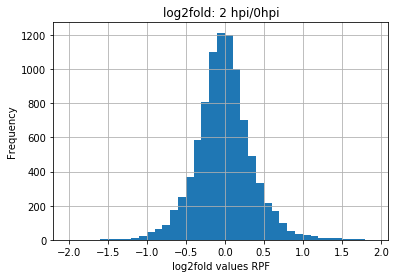

In [27]:
plt.hist(RPF['log2cdRPKM1'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM1']))
plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.160924884532


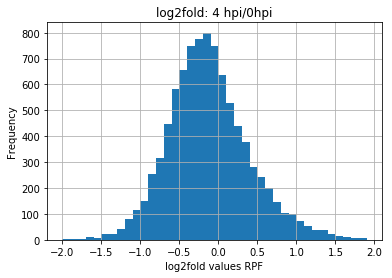

In [28]:
plt.hist(RPF['log2cdRPKM2'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM2']))

plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.78138590165


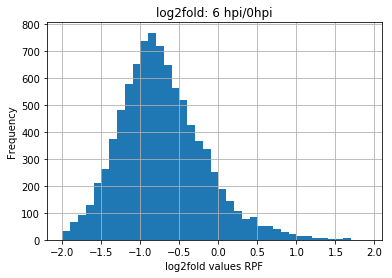

In [29]:

plt.hist(RPF['log2cdRPKM3'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM3']))


plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

-0.895368741896


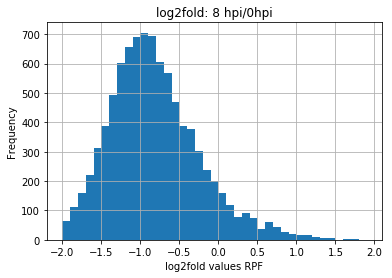

In [30]:

plt.hist(RPF['log2cdRPKM4'], bins = np.arange(-2.0,2.0,0.1))
print(np.median(RPF['log2cdRPKM4']))

plt.xlabel('log2fold values RPF')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
RNASeq_2['log2cdRPKM1']=RNASeq_2['cdRPKM1']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM2']=RNASeq_2['cdRPKM2']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM3']=RNASeq_2['cdRPKM3']-RNASeq_2['cdRPKM0']
RNASeq_2['log2cdRPKM4']=RNASeq_2['cdRPKM4']-RNASeq_2['cdRPKM0']

In [ ]:
RNASeq.head(5)

In [ ]:
RNASeq_2.head(5)

In [ ]:
filteredRNASeq = RNASeq_2[(RNASeq_2['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq_2['log2cdRPKM2'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM3'] <= 0.5)
                        & (RNASeq_2['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq = RNASeq[(RNASeq['log2cdRPKM1'] <= 0.5) 
                        & (RNASeq['log2cdRPKM2'] <= 0.5)
                        & (RNASeq['log2cdRPKM3'] <= 0.5)
                        & (RNASeq['log2cdRPKM4'] <= 0.5)]
filteredRNASeq = filteredRNASeq[(filteredRNASeq['log2cdRPKM1'] >= -0.5) 
                                & (filteredRNASeq['log2cdRPKM2'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM3'] >= -0.5)
                                & (filteredRNASeq['log2cdRPKM4'] >= -0.5)]



In [ ]:
filteredRNASeq.head(5)

In [ ]:
print(filteredRNASeq.shape)

In [ ]:
TE = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), [RPF,RNASeq])
TE.head()

In [ ]:
TE.shape

In [ ]:
TE['cdRPKM0_x'] = TE['cdRPKM0_x']-TE['cdRPKM0_y']
TE['cdRPKM1_x'] = TE['cdRPKM1_x']-TE['cdRPKM1_y']
TE['cdRPKM2_x'] = TE['cdRPKM2_x']-TE['cdRPKM2_y']
TE['cdRPKM3_x'] = TE['cdRPKM3_x']-TE['cdRPKM3_y']
TE['cdRPKM4_x'] = TE['cdRPKM4_x']-TE['cdRPKM4_y']
for i in range(0,5):
    TE.rename(columns={'cdRPKM'+str(i)+'_x':'TE'+str(i)}, inplace=True)
TE = TE[['AccNum', 'GeneName','TE0','TE1','TE2','TE3','TE4']]
TE.head()

In [ ]:
TE['foldTE1']=TE['TE1']-TE['TE0']
TE['foldTE2']=TE['TE2']-TE['TE0']
TE['foldTE3']=TE['TE3']-TE['TE0']
TE['foldTE4']=TE['TE4']-TE['TE0']

In [ ]:
TE.head(5)

In [ ]:
plt.hist(TE['foldTE1'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 2 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE2'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 4 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE3'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 6 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
plt.hist(TE['foldTE4'], bins = np.arange(-2.0,2.0,0.1))


plt.xlabel('log2fold values TE')
plt.ylabel('Frequency')
plt.title('log2fold: 8 hpi/0hpi')
# plt.axis(-2,2)
plt.grid(True)

plt.show()

In [ ]:
TE.to_csv('/Users/akankshitadash/Desktop/TE_medianNormalize.txt',sep='\t',index=False)

In [ ]:
previous = 'AdjustedRPKMOutput/RPF_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_7_1_genome.txt','TTAGGC-s_7_1_genome.txt',
             'CAGATC-s_7_1_genome.txt','GCCAAT-s_7_1_genome.txt',
             'CTTGTA-s_7_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
previous = 'AdjustedRPKMOutput/RNASeq_chrE/geneTXCD_RPKMoutput_EVadjusted_ReadOutput_'
timepoints = ['ATCACG-s_6_1_genome.txt','TTAGGC-s_6_1_genome.txt',
             'CAGATC-s_6_1_genome.txt','GCCAAT-s_6_1_genome.txt',
             'CTTGTA-s_6_1_genome.txt'
            ]
dataframes = []
for idx,file in enumerate(timepoints):
    df = pd.read_csv(previous+file, sep="	", na_values=['-'])
    df = df.dropna(how='any')
    df = df[['AccNum', 'GeneName','cdReads',
       'cdRPKM']]
    df.rename(columns={'cdRPKM':'cdRPKM'+str(idx), 'cdReads':'cdReads'+str(idx)}, inplace=True)
    dataframes.append(df)

In [ ]:
df_rnaseq = reduce(lambda left,right: pd.merge(left,right,on=['AccNum','GeneName']), dataframes)
df_rnaseq.to_csv('AdjustedRPKMOutput/RNASeq_chrE.txt',sep='\t',index=False)